In [1]:
# pip install opencv-python
# %pip install folium
# %pip install imutils
# %pip install Pillow

In [2]:
# import the necessary packages
import imutils
from imutils import paths
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import Image

In [3]:
def find_marker(image):
# convert the image to grayscale, blur it, and detect edges
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 35, 125)
    # find the contours in the edged image and keep the largest one;
    # we'll assume that this is our piece of paper in the image
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    # compute the bounding box of the of the paper region and return it
    return cv2.minAreaRect(c)


((1093.36865234375, 1324.103271484375), (302.48553466796875, 79.21715545654297), 48.16387939453125)


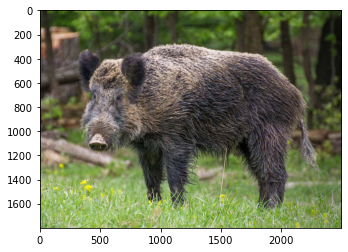

In [27]:
image=mpimg.imread('C:\\Users\\IT\\Downloads\\Wildschwein,_Nähe_Pulverstampftor_(cropped).jpg')
aa=find_marker(image)
print(aa)
plt.imshow(image)

In [5]:
# Find distance from camera to object using Python and OpenCV
def distance_to_camera(knownWidth, focalLength, perWidth):
	# compute and return the distance from the maker to the camera
	return (knownWidth * focalLength) / perWidth

In [6]:
# Find distance from camera to object using Python and OpenCV
# initialize the known distance from the camera to the object, which
# in this case is 24 inches
KNOWN_DISTANCE = 24.0
# initialize the known object width, which in this case, the piece of
# paper is 12 inches wide
KNOWN_WIDTH = 11.0
# load the furst image that contains an object that is KNOWN TO BE 2 feet
# from our camera, then find the paper marker in the image, and initialize
# the focal length
image = image
marker = find_marker(image)
focalLength = (marker[1][0] * KNOWN_DISTANCE) / KNOWN_WIDTH
focalLength

659.9684392755681

In [28]:
# Find distance from camera to object using Python and OpenCV
# loop over the images
# for imagePath in sorted(paths.list_images("images")):
# load the image, find the marker in the image, then compute the
# distance to the marker from the camera
for i in range(5):
    image = image
#     image=cv2.threshold(image,200,255,cv2.THRESH_BINARY)
    marker = find_marker(image)
    inches = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])
    print(inches)
    # draw a bounding box around the image and display it
    box = cv2.cv.BoxPoints(marker) if imutils.is_cv2() else cv2.boxPoints(marker)
    box = np.int0(box)
    cv2.drawContours(image, [box],-1, (0, 255, 0), 2)
    cv2.putText(image, "%.2fft" % (inches / 12),
    (image.shape[1] - 200, image.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX,
    2.0, (0, 255, 0), 3)
    cv2.imshow("boar", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

23.999999999999996
25.869691021124172
26.05451107931937
24.088676481399457
19.134436125496396


In [9]:
distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])

print

19.134436125496396

In [10]:
cv2.destroyAllWindows()

In [13]:
?cv2.putText